In [108]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
from sklearn.mixture import GaussianMixture as GMM

In [2]:
file = 'preped_som_rfls.pickle'

In [3]:
spectra = pickle.load(open(file, 'rb'))

In [4]:
spectra['20220224'].shape

(80, 100, 335)

In [142]:
time_1 = spectra['20220224'].copy()
time_1_reshaped = time_1.reshape(time_1.shape[0]*time_1.shape[1], time_1.shape[2])

In [143]:
start_time = time.time()
sum_sq_dist = []
seed = 8
k = range(1,15)
for i in k:
    kmeans = KMeans(init = 'k-means++', n_clusters = i, random_state = seed).fit(time_1_reshaped)
    sum_sq_dist.append(kmeans.inertia_)
    
print('-----%s seconds -----' % (time.time() - start_time))

-----14.784918069839478 seconds -----


<function matplotlib.pyplot.show(close=None, block=None)>

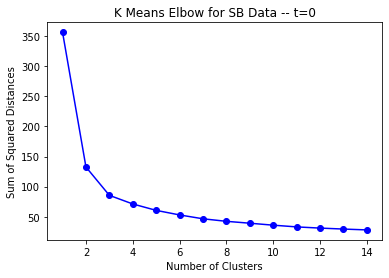

In [144]:
plt.plot(k, sum_sq_dist, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('K Means Elbow for SB Data -- t=0')
plt.show

In [8]:
print(spectra.keys())

dict_keys(['20220224', '20220228', '20220308', '20220316', '20220322', '20220405', '20220412', '20220420', '20220503', '20220511', '20220517', '20220529'])


In [26]:
spectra.keys()

dict_keys(['20220224', '20220228', '20220308', '20220316', '20220322', '20220405', '20220412', '20220420', '20220503', '20220511', '20220517', '20220529'])

In [ ]:
spectra

In [124]:
# Running kmeans through all time points in time series
labels = []
km_predict_tpoints = []
inits = []
count = 0
for i in spectra.keys():
    time_point = spectra[i].copy()
    time_point_reshapen = time_point.reshape(time_point.shape[0]*time_point.shape[1], time_point.shape[2])
    if i == '20220224':
        kmeans = KMeans(init = 'k-means++', n_clusters = 4, random_state = seed).fit(time_point_reshapen)
        Z = kmeans.predict(time_point_reshapen)
        clusterCount = np.bincount(kmeans.labels_)
        km_predict_tpoints.append(clusterCount)
        cluster_inits = kmeans.cluster_centers_
        inits.append(cluster_inits)
        labels.append(kmeans.labels_)
    else:
        #print('count: ', count)
        #print('inits: ', inits)
        kmeans = KMeans(init = inits[count-1], n_clusters = 4, random_state = seed).fit(time_point_reshapen)
        Z = kmeans.predict(time_point_reshapen)
        clusterCount = np.bincount(kmeans.labels_)
        km_predict_tpoints.append(clusterCount)
        cluster_inits = kmeans.cluster_centers_
        inits.append(cluster_inits)
        labels.append(kmeans.labels_)
        
    count+= 1

/Users/varunpatro/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/varunpatro/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/varunpatro/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/varunpatro/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/varunpatro/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kme

In [125]:
len(inits)

12

Text(0.5, 1.0, 'Temporal Variation of Cluster 1')

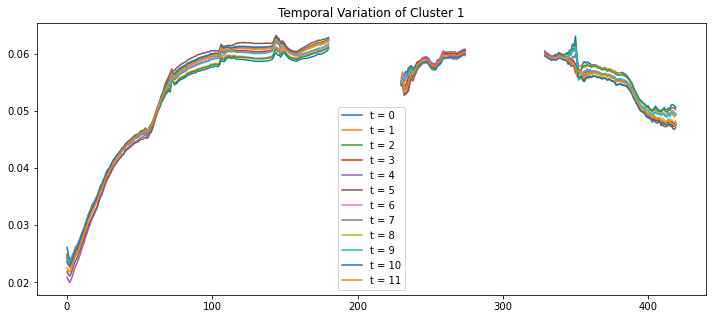

In [126]:
# plot center 1 over time

mean_1_display = np.empty((12,425))
mean_1_display[:] = np.nan

for i in range(len(inits)):
    mean_1_display[i, 0:181] = inits[i][0][0:181]
    mean_1_display[i, 230:275] = inits[i][0][188:233]
    mean_1_display[i, 329:420] = inits[i][0][233:324]
    
plt.figure(figsize = (12,5))
for i in range(mean_1_display.shape[0]):
    plt.plot(mean_1_display[i], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 1')

Text(0.5, 1.0, 'Temporal Variation of Cluster 2')

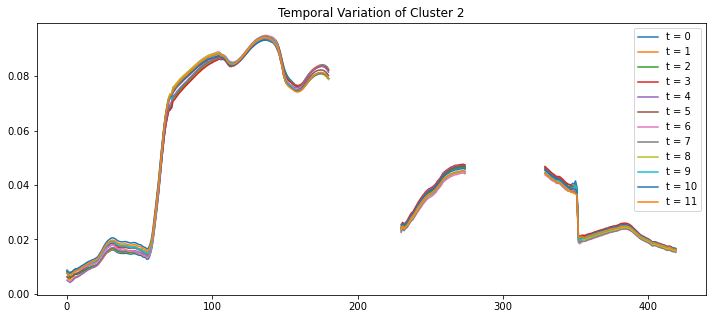

In [127]:
# plot center 1 over time

mean_2_display = np.empty((12,425))
mean_2_display[:] = np.nan

for i in range(len(inits)):
    mean_2_display[i, 0:181] = inits[i][1][0:181]
    mean_2_display[i, 230:275] = inits[i][1][188:233]
    mean_2_display[i, 329:420] = inits[i][1][233:324]
    
plt.figure(figsize = (12,5))
for i in range(mean_2_display.shape[0]):
    plt.plot(mean_2_display[i], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 2')

Text(0.5, 1.0, 'Temporal Variation of Cluster 3')

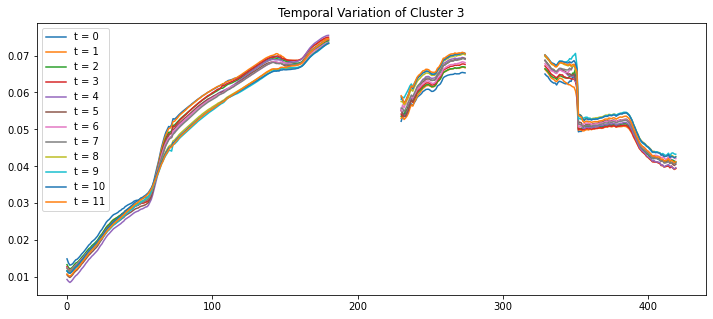

In [128]:
# plot center 1 over time

mean_3_display = np.empty((12,425))
mean_3_display[:] = np.nan

for i in range(len(inits)):
    mean_3_display[i, 0:181] = inits[i][2][0:181]
    mean_3_display[i, 230:275] = inits[i][2][188:233]
    mean_3_display[i, 329:420] = inits[i][2][233:324]
    
plt.figure(figsize = (12,5))
for i in range(mean_3_display.shape[0]):
    plt.plot(mean_3_display[i], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 3')

Text(0.5, 1.0, 'Temporal Variation of Cluster 4')

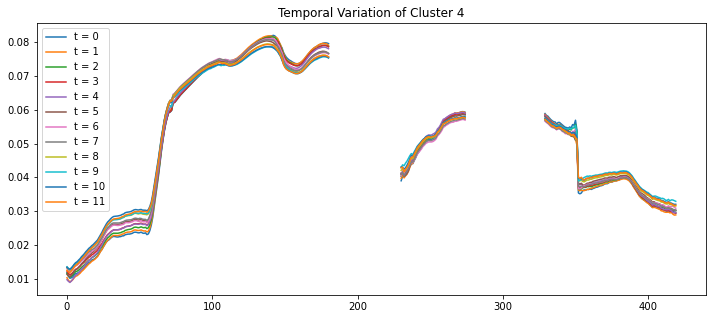

In [129]:
# plot center 1 over time

mean_4_display = np.empty((12,425))
mean_4_display[:] = np.nan

for i in range(len(inits)):
    mean_4_display[i, 0:181] = inits[i][3][0:181]
    mean_4_display[i, 230:275] = inits[i][3][188:233]
    mean_4_display[i, 329:420] = inits[i][3][233:324]
    
plt.figure(figsize = (12,5))
for i in range(mean_4_display.shape[0]):
    plt.plot(mean_4_display[i], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 4')

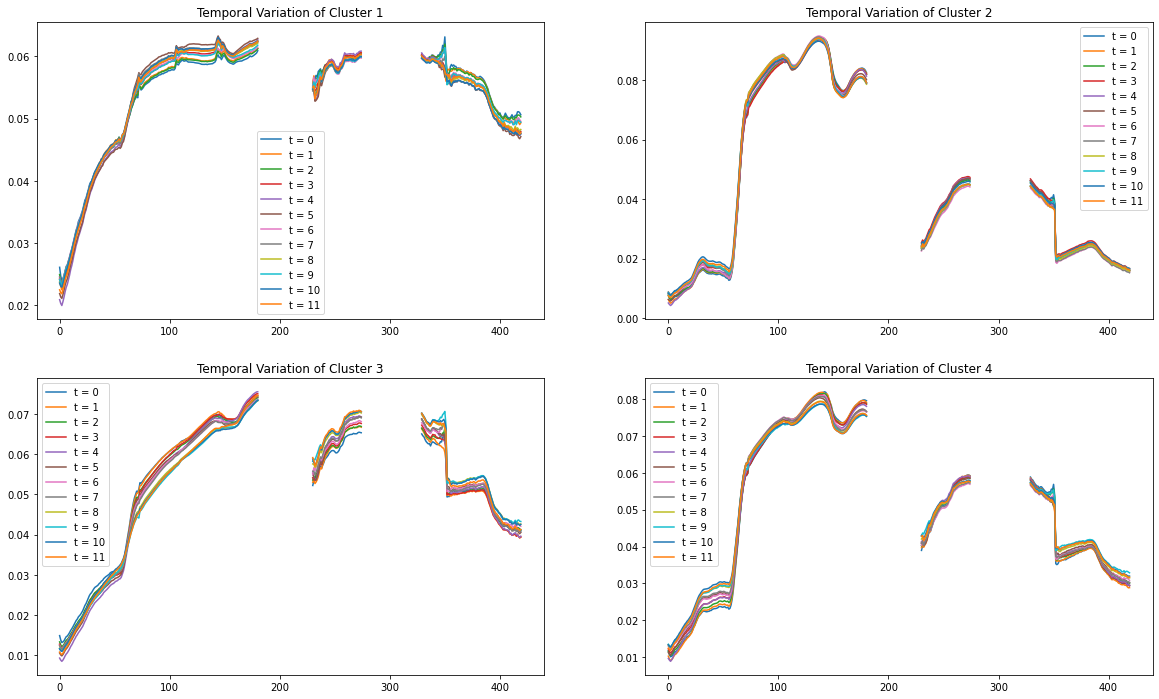

In [130]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))
for i in range(4):
    if i == 0:
        # plot center 1 over time

        mean_1_display = np.empty((12,425))
        mean_1_display[:] = np.nan

        for i in range(len(inits)):
            mean_1_display[i, 0:181] = inits[i][0][0:181]
            mean_1_display[i, 230:275] = inits[i][0][188:233]
            mean_1_display[i, 329:420] = inits[i][0][233:324]

        for i in range(mean_1_display.shape[0]):
            axs[0,0].plot(mean_1_display[i], label = 't = ' + str(i))
        axs[0,0].legend()
        axs[0,0].set_title('Temporal Variation of Cluster 1')
        
    if i == 1:
        
        # plot center 2 over time

        mean_2_display = np.empty((12,425))
        mean_2_display[:] = np.nan

        for i in range(len(inits)):
            mean_2_display[i, 0:181] = inits[i][1][0:181]
            mean_2_display[i, 230:275] = inits[i][1][188:233]
            mean_2_display[i, 329:420] = inits[i][1][233:324]

        for i in range(mean_2_display.shape[0]):
            axs[0,1].plot(mean_2_display[i], label = 't = ' + str(i))
        axs[0,1].legend()
        axs[0,1].set_title('Temporal Variation of Cluster 2')
        
    if i == 2:
        
        mean_3_display = np.empty((12,425))
        mean_3_display[:] = np.nan

        for i in range(len(inits)):
            mean_3_display[i, 0:181] = inits[i][2][0:181]
            mean_3_display[i, 230:275] = inits[i][2][188:233]
            mean_3_display[i, 329:420] = inits[i][2][233:324]

        for i in range(mean_3_display.shape[0]):
            axs[1,0].plot(mean_3_display[i], label = 't = ' + str(i))
        axs[1,0].legend()
        axs[1,0].set_title('Temporal Variation of Cluster 3')
        
    if i == 3:
        mean_4_display = np.empty((12,425))
        mean_4_display[:] = np.nan

        for i in range(len(inits)):
            mean_4_display[i, 0:181] = inits[i][3][0:181]
            mean_4_display[i, 230:275] = inits[i][3][188:233]
            mean_4_display[i, 329:420] = inits[i][3][233:324]

        for i in range(mean_4_display.shape[0]):
            axs[1,1].plot(mean_4_display[i], label = 't = ' + str(i))
        axs[1,1].legend()
        axs[1,1].set_title('Temporal Variation of Cluster 4')
        
        
        

In [131]:
mean_1 = []
mean_2 = []
mean_3 = []
mean_4 = []

for i in range(mean_1_display.shape[0]):
    mean_1.append(mean_1_display[i])
    mean_2.append(mean_2_display[i])
    mean_3.append(mean_3_display[i])
    mean_4.append(mean_4_display[i])
    

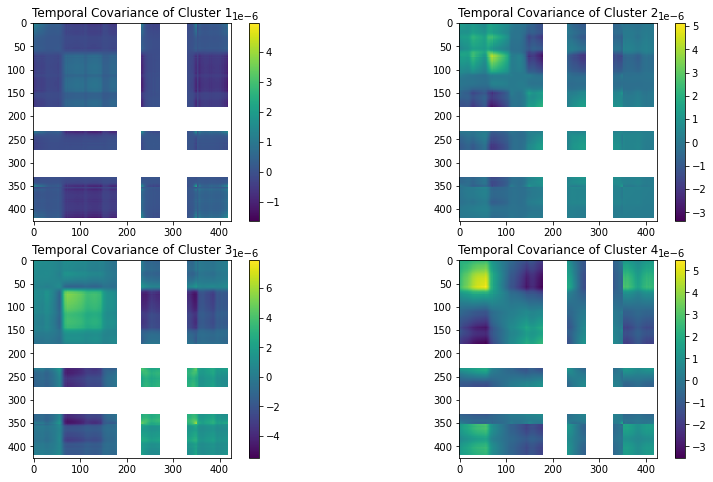

In [132]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (14,8))
for i in range(4):
    if i == 0:
        
        mean_1 = np.array(mean_1)
        Cov_1 = np.cov(mean_1, rowvar = False)
        im = axs[0,0].imshow(Cov_1)
        plt.colorbar(im, ax = axs[0,0])
        axs[0,0].set_title('Temporal Covariance of Cluster 1')
        
    if i == 1:
        
        mean_2 = np.array(mean_2)
        Cov_2 = np.cov(mean_2, rowvar = False)
        im = axs[0,1].imshow(Cov_2)
        plt.colorbar(im, ax = axs[0,1])
        axs[0,1].set_title('Temporal Covariance of Cluster 2')
        
    if i == 2:
        
        mean_3 = np.array(mean_3)
        Cov_3 = np.cov(mean_3, rowvar = False)
        im = axs[1,0].imshow(Cov_3)
        plt.colorbar(im, ax = axs[1,0])
        axs[1,0].set_title('Temporal Covariance of Cluster 3')
        
    if i == 3:
        
        mean_4 = np.array(mean_4)
        Cov_4 = np.cov(mean_4, rowvar = False)
        im = axs[1,1].imshow(Cov_4)
        plt.colorbar(im, ax = axs[1,1])
        axs[1,1].set_title('Temporal Covariance of Cluster 4')

In [133]:
len(inits)

12

In [134]:
final_clusters = []
final_clusters.append(mean_1_display[11])
final_clusters.append(mean_2_display[11])
final_clusters.append(mean_3_display[11])
final_clusters.append(mean_4_display[11])

Text(0.5, 1.0, 'Clusters for Final Time Point (t = 11)')

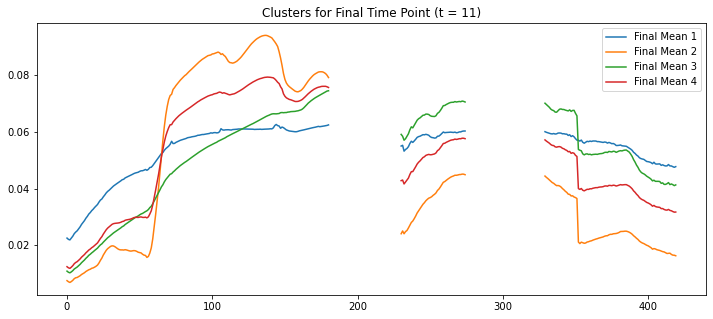

In [135]:
plt.figure(figsize = (12,5))
for i in range(len(final_clusters)):
    plt.plot(final_clusters[i], label = 'Final Mean ' + str(i+1))
plt.legend()
plt.title('Clusters for Final Time Point (t = 11)')

In [136]:
km_predict_tpoints

[array([2892, 1556, 1733, 1819]),
 array([3092, 1430, 1750, 1728]),
 array([3081, 1403, 1760, 1756]),
 array([3217, 1405, 1563, 1815]),
 array([3333, 1362, 1427, 1878]),
 array([3159, 1547, 1408, 1886]),
 array([3106, 1450, 1591, 1853]),
 array([3180, 1453, 1522, 1845]),
 array([3130, 1558, 1471, 1841]),
 array([3121, 1591, 1393, 1895]),
 array([3191, 1512, 1383, 1914]),
 array([3222, 1614, 1341, 1823])]

In [137]:
t_1 = []
t_2 = []
t_3 = []
t_4 = []


for i in range(len(km_predict_tpoints)):
    t_1.append(km_predict_tpoints[i][0])
    t_2.append(km_predict_tpoints[i][1])
    t_3.append(km_predict_tpoints[i][2])
    t_4.append(km_predict_tpoints[i][3])

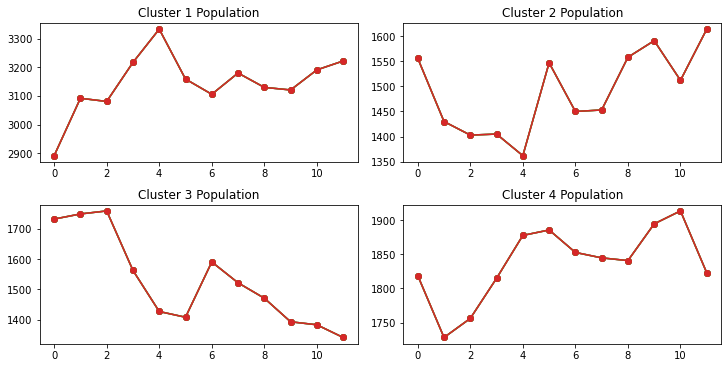

In [138]:
t = range(0,12)
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,5), constrained_layout = True)
for i in range(4):
    axs[0,0].plot(t, t_1, marker = 'o')
    axs[0,0].set_title('Cluster 1 Population')
    axs[0,1].plot(t, t_2, marker = 'o')
    axs[0,1].set_title('Cluster 2 Population')
    axs[1,0].plot(t, t_3, marker = 'o')
    axs[1,0].set_title('Cluster 3 Population')
    axs[1,1].plot(t, t_4, marker = 'o')
    axs[1,1].set_title('Cluster 4 Population')


    

In [139]:
image_0 = spectra['20220224'].copy()

In [140]:
image_0.shape

(80, 100, 335)

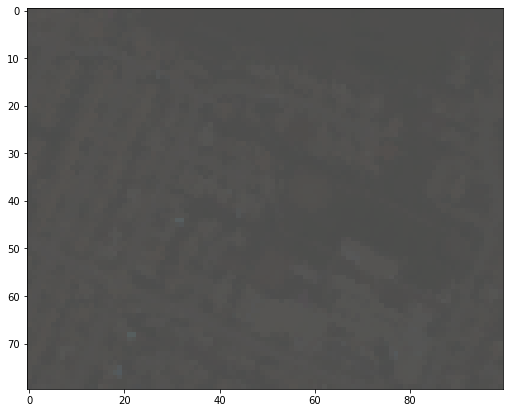

In [141]:
fig = plt.figure(figsize = (12, 7))
r = image_0[:,:,54]
g = image_0[:,:,34]
b = image_0[:,:,16]
img = np.dstack((r, g, b))
plt.imshow(img);

z = np.ones((image_0.shape[0], image_0.shape[1]))
img = np.dstack((z, z, z))
plt.imshow(img, alpha = 0.3)

In [169]:
color_1 = (255,0,0)
color_2 = (0,255,0)
color_3 = (0,0,255)
color_4 = (255,255,225)

In [170]:
colored_assignments = np.zeros((12,8000,3)) 
for i in range(len(labels)): # 12 times
    assignments = labels[i].copy() # 8000 elements
    for j in range(assignments.shape[0]):
        if assignments[j] == 0:
            colored_assignments[i][j] = color_1
        elif assignments[j] == 1:
            colored_assignments[i][j] = color_2
        elif assignments[j] == 2:
            colored_assignments[i][j] = color_3
        else:
            colored_assignments[i][j] = color_4
        

In [171]:
reshaped = colored_assignments[0].reshape((80,100,3)).copy()

In [172]:
np.bincount(labels[0])

array([2892, 1556, 1733, 1819])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


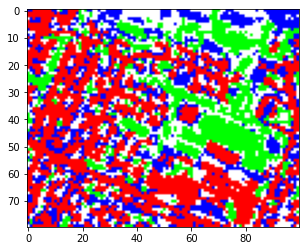

In [173]:
plt.imshow(reshaped)

12

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

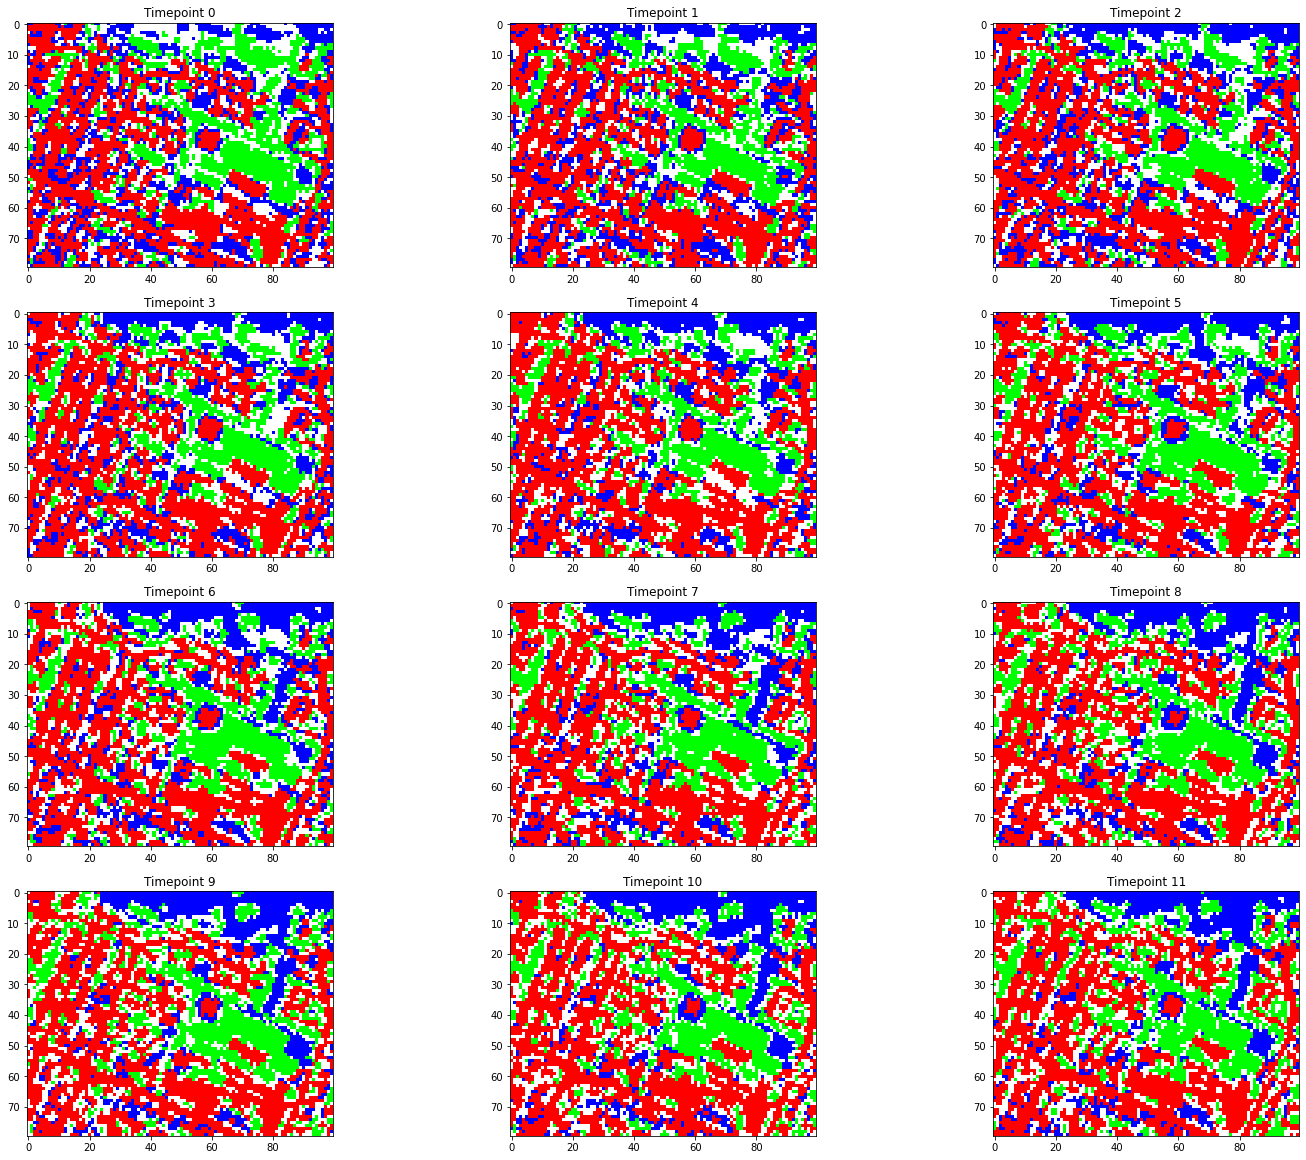

In [199]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (20,16), constrained_layout = True)

row = 0
col = 0
for i in range(colored_assignments.shape[0]):
    if col == 3:
        row += 1
        col = 0
    img = colored_assignments[i].reshape((80,100,3)).copy()
    axs[row,col].imshow(img)
    axs[row,col].set_title('Timepoint ' + str(i))
    col+= 1
    